In [8]:
import sys
sys.path.append("../Modules/")

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
import numpy as np
import scipy.spatial.distance as dist


from Geometry_Path import Geometry_Path
from Geometry_Grid import Geometry_Grid
from Geometry_Free import Geometry_Free
from DbscanLoop    import DbscanLoop

from Definitions import get_datafolder

basefolder = get_datafolder()



In [9]:
def PlotScatter(labels_included,labels,XC,ax=[]):
 
        if(labels == []):
            labels = -np.ones((len(XC),));
            
        # Get correctly detected:
        if(ax == []):        
            fig,ax = plt.subplots();
        mark = (labels_included==-1);
        sns.scatterplot(x=XC[mark,0],y=XC[mark,1],color='grey',alpha=0.2,size=0.2,ax=ax,linewidth=0,legend=False);

        mark = ((labels_included>=0)*(labels==-1));
        sns.scatterplot(x=XC[mark,0],y=XC[mark,1],color='blue',alpha=0.6,size=0.2,ax=ax,linewidth=0,legend=False);

        mark = (labels>=0);
        sns.scatterplot(x=XC[mark,0],y=XC[mark,1],hue=labels[mark],palette='Set1',
                        size=0.2,alpha=0.6,legend=False,ax=ax);
        ax.set_aspect('equal');
        
        ax.set_aspect(1);
        ax.set_xticks([]);
        ax.set_yticks([]);
        ax.axis('off');
        
        ax.set_xlim(-50,50);
        ax.set_ylim(-50,50);

def GetCorePoints(XS_,eps,threshold):
    D = dist.squareform(dist.pdist(XS_));
    noP = np.zeros((len(XS_),));
    for i in np.arange(len(XS_)):
        noP[i] = np.sum(D[i,:]<eps)
        
    core = -1*np.ones((len(XS_),));    
    core[noP >= threshold] = 0;
    return core;

In [10]:
params = {
             "n_side":5,
             "Delta_ratio":1.,
             "noise_ratio":0,
             "seed":0,
             "unit_type": "Clusters_DNA_1mers",
             "sigma":7,
             "threshold":10
        }

G = Geometry_Grid(basefolder,params['unit_type'],
              n_side=params['n_side'],
              Delta_ratio=params['Delta_ratio'],
              noise_ratio=params['noise_ratio']);

# Get example
XC = G.template_clusters[0];

eps         = params["sigma"];
min_samples = params["threshold"];

Loaded 29 template clusters..


<ipython-input-9-81d145978dd7>:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if(labels == []):
<ipython-input-9-81d145978dd7>:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if(labels == []):
<ipython-input-9-81d145978dd7>:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if(labels == []):
<ipython-input-9-81d145978dd7>:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if(labels == []):


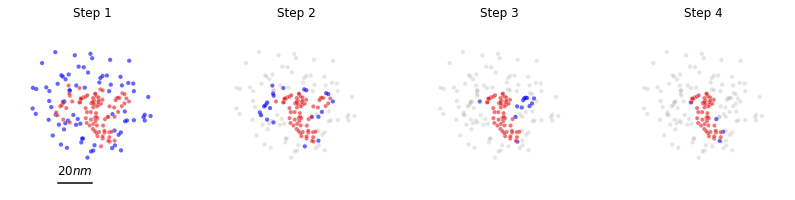

In [12]:

fig,axs = plt.subplots(1,4,figsize=(14,5));
count   = 0;
#Show how DBSCAN Loop works
XS       = XC;
XS_full  = XS;
n_old    = len(XS);
idx_core = np.arange(len(XS));
corePts = (GetCorePoints(XS,eps,min_samples) == 0);
XS       = XS[corePts]   

idx_core_old = np.copy(idx_core);
idx_core = idx_core[corePts]

mark_included = np.ones((len(XS_full),));

while((n_old != len(XS)) and (len(XS)>0)):

    n_old = len(XS)    
    
    if(count < 4):        
        mark = -1*np.ones((len(XS_full),));
        mark[idx_core] = 0;
        
        mark_old = -1*np.ones((len(XS_full),));
        mark_old[idx_core_old] = 0;
        
        PlotScatter(mark_old,mark,XS_full,ax=axs[count]);
                
        axs[count].set_title("Step "+str(count+1));
        count += 1
    
    corePts = (GetCorePoints(XS,eps,min_samples)==0);
    
    XS       = XS[corePts];  
    idx_core_old = np.copy(idx_core);
    idx_core = idx_core[corePts];


ax  = axs[0];    
x_0 = -20;
y_0 = np.min(XC[:,1]) - 15;
ax.plot([x_0,x_0+20],[y_0,y_0],'k')
ax.annotate('$20nm$',(x_0+10,y_0+5),fontsize='large',ha='center');         

plt.savefig(basefolder+"FigS2_DBSCAN_Loop.pdf",bbox_inches="tight")